In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
grid_size = 20
n_phlebo = 3
n_orders = 10
seed = 1
rng = np.random.default_rng(seed)

In [79]:
# creating empty grid
grid = pd.DataFrame()

grid['x'] = np.repeat(np.arange(0, grid_size), grid_size)
grid['y'] = np.tile(np.arange(0, grid_size), grid_size)

In [80]:
# select locations 
selected_dots = rng.choice(grid.index.to_numpy(), replace=False, size=n_phlebo+n_orders+1) # +1 for catchment area
order_locations = selected_dots[:n_orders].tolist()
phlebo_homes = selected_dots[n_orders:n_orders+n_phlebo].tolist()
catchment = selected_dots[-1].tolist()

In [81]:
print(order_locations, phlebo_homes, catchment)

[198, 13, 98, 331, 293, 168, 108, 345, 123, 183] [323, 373, 56] 370


In [82]:
grid['locations'] = 0

grid.loc[order_locations, 'locations'] = 'Customer Order'
grid.loc[phlebo_homes, 'locations'] = 'Phlebotomist Home'
grid.loc[catchment, 'locations'] = 'Catchment Area'

In [114]:
addresses_list = []
grid['address'] = grid['x'].astype('str') + "," + grid['y'].astype('str')

addresses_list.append(grid.loc[catchment, 'address'])
addresses_list.extend(grid.loc[phlebo_homes, 'address'].tolist())
addresses_list.extend(grid.loc[order_locations, 'address'].tolist())

In [85]:
# grid['order_locations'] = 0
# grid['phlebo_homes'] = 0
# grid['catchment'] = 0

# grid.loc[order_locations, 'order_locations'] = 1
# grid.loc[phlebo_homes, 'phlebo_homes'] = 1
# grid.loc[catchment, 'catchment'] = 1

In [116]:
print(grid, addresses_list)

      x   y locations address
0     0   0         0     0,0
1     0   1         0     0,1
2     0   2         0     0,2
3     0   3         0     0,3
4     0   4         0     0,4
..   ..  ..       ...     ...
395  19  15         0   19,15
396  19  16         0   19,16
397  19  17         0   19,17
398  19  18         0   19,18
399  19  19         0   19,19

[400 rows x 4 columns] ['18,10', '16,3', '18,13', '2,16', '9,18', '0,13', '4,18', '16,11', '14,13', '8,8', '5,8', '17,5', '6,3', '9,3']


### Visualisation

([<matplotlib.axis.YTick at 0x223db96ebb0>,
 [Text(0, 0.0, '0'),
  Text(0, 1.0, '1'),
  Text(0, 2.0, '2'),
  Text(0, 3.0, '3'),
  Text(0, 4.0, '4'),
  Text(0, 5.0, '5'),
  Text(0, 6.0, '6'),
  Text(0, 7.0, '7'),
  Text(0, 8.0, '8'),
  Text(0, 9.0, '9'),
  Text(0, 10.0, '10'),
  Text(0, 11.0, '11'),
  Text(0, 12.0, '12'),
  Text(0, 13.0, '13'),
  Text(0, 14.0, '14'),
  Text(0, 15.0, '15'),
  Text(0, 16.0, '16'),
  Text(0, 17.0, '17'),
  Text(0, 18.0, '18'),
  Text(0, 19.0, '19'),
  Text(0, 20.0, '20')])

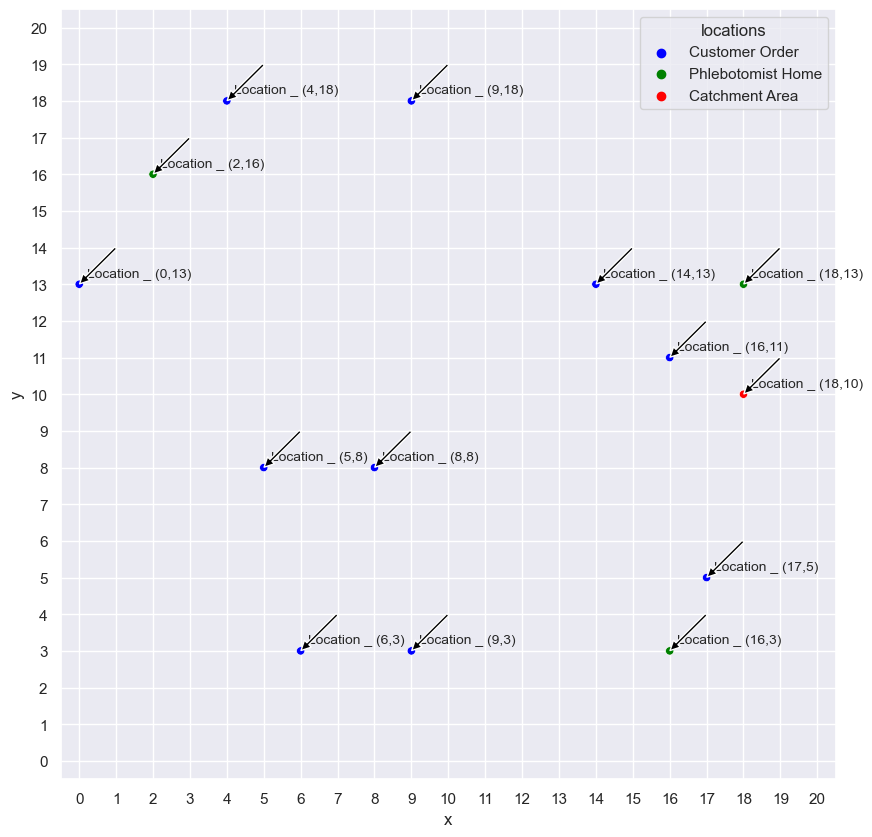

In [117]:
# set up
plt.figure(figsize=(10,10))
sns.set_style("darkgrid")

# plot points
palette = {
    'Customer Order': 'blue', 
    'Phlebotomist Home': 'green',
    'Catchment Area': 'red'
}
g = sns.scatterplot(data=grid[grid['locations'] != 0], x='x', y='y', hue='locations', palette=palette)

# add labels to points
for index in selected_dots:
    x = grid.loc[index, 'x']
    y = grid.loc[index, 'y']
    g.text(x=x+0.2, y=y+0.2, s=f"Location _ ({x},{y})", fontsize=10)
    # # draws arrow from xytext to xy
    # g.annotate('',
    #             xy=(x,y),
    #             xytext=(x+1,y+1),
    #             arrowprops=dict(facecolor='black',width=2.0,headwidth=7.0,headlength=7.0,shrink=0.01))

# set x and y lims
plt.xlim(-0.5, grid_size+0.5)
plt.ylim(-0.5, grid_size+0.5)

# adjust ticks
plt.xticks(np.arange(0, grid_size+1, 1.0))
plt.yticks(np.arange(0, grid_size+1, 1.0))